<a href="https://colab.research.google.com/github/cho52o/statistical_theory2020/blob/main/%5B%ED%86%B5%EA%B3%84%ED%95%99%EC%9B%90%EB%A1%A0%5D%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95_%EB%B0%95%EC%B4%88%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_s = pd.read_csv('/content/drive/My Drive/Salaries.csv')
df_b = pd.read_csv('/content/drive/My Drive/Batting.csv')
titinic = pd.read_csv('/content/drive/My Drive/titinic_data.csv')

In [ ]:
titinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
titinic['survived'].mean() # 타이타닉 생존률

0.3819709702062643

In [ ]:
titinic['survived'].shape[0] # 타이타닉 탑승자

1310

06.17.수 : 연구문제

> 2016년 MLB 선수 연봉의 95% 신뢰구간을 구하시오.

> 2016년 MLB 선수 중 1,000만불 이상의 선수의 비율에 대한 95% 신뢰구간을 구하시오.

In [ ]:
df_s.columns

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

In [ ]:
df0=df_s[df_s['yearID']==2016]
df0.head(5)

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300
25578,2016,ARI,NL,britoso01,508500
25579,2016,ARI,NL,castiwe01,3700000


기초통계량 구하기 : 평균, 표준편차, 최소값, 제일사분위, 중앙값(제이사분위),제삼사분위, 최대값

> 중앙: 평균(mu), 중앙값(median)

> 분포 : 표준편차(sigma), 범위(R), 사분위(inter-Quartile Range)

In [ ]:
df0['salary'].describe()[6]-df0['salary'].describe()[4] #IQR

5480000.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


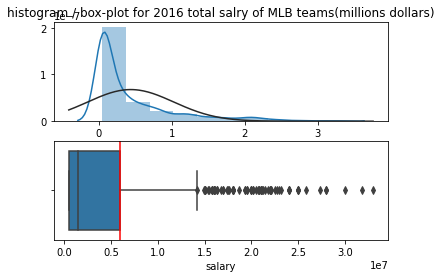

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(211)
from scipy.stats import norm
sns.distplot(df0['salary'],fit=norm, bins=10)
plt.title('histogram / box-plot for 2016 total salry of MLB teams(millions dollars)')
plt.subplot(212)
sns.boxplot(df0['salary'])
plt.axvline(df0['salary'].describe()[6],color='red')
plt.show()

In [ ]:
import scipy.stats as st
st.t.ppf(0.975,df0.shape[0]-1)

1.9627522328330007

In [ ]:
L=df0['salary'].mean()-st.t.ppf(0.975,df0.shape[0]-1)*df0['salary'].std()/(df0['salary'].shape[0])**0.5
U=df0['salary'].mean()+st.t.ppf(0.975,df0.shape[0]-1)*df0['salary'].std()/(df0['salary'].shape[0])**0.5
print('신뢰구간 하한 :',L,'신뢰구간 상한 :',U)

신뢰구간 하한 : 3999907.3778372044 신뢰구간 상한 : 4792911.829665727


# 데이터

> MLB 선수 연봉 데이터를 불러오고 2016년 데이터를 df에 저장하시오.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Salaries.csv')
df16=df[df['yearID']==2016]
df15=df[df['yearID']==2015]
n=df16.shape[0]
m=df15.shape[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    26428 non-null  int64 
 1   teamID    26428 non-null  object
 2   lgID      26428 non-null  object
 3   playerID  26428 non-null  object
 4   salary    26428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


# 문제 #1 모비율 검정

1. 연봉 10,000,000$ 이상인 선수 비율에 대한 95% 신뢰구간을 구하시오.

In [ ]:
# 점 추정
phat=sum(df16['salary']>10000000)/n
phat

0.141852286049238

In [ ]:
import scipy.stats as st

In [ ]:
# 구간 추정
L=phat-st.norm.ppf(0.975)*(phat*(1-phat)/n)**0.5
U=phat+st.norm.ppf(0.975)*(phat*(1-phat)/n)**0.5
print('신뢰구간 하한 :',L,'신뢰구간 상한 :',U)

신뢰구간 하한 : 0.1184384393798784 신뢰구간 상한 : 0.16526613271859758


2. 연봉 10,000,000$ 이상인 선수 비율이 2000년에는 10%였다. 2016년 2000년에 비해 높아졌다고 할 수 있나? 유의수준 5%에서 검정하시오.

> 귀무가설 연봉 10,000,000$ 이상인 선수 비율이 10%이다., 
대립가설 연봉 10,000,000$ 이상인 선수 비율이 10%보다 높아졌다.

>검정통계량 계산
T=phat-p/(phat(1-phat)/n)**0.5

In [ ]:
TS=(phat-0.1)/(phat*(1-phat)/n)**0.5
TS

3.5034385628962617

> 유의확률 계산
p-value = P(z > |T|)

In [ ]:
1-st.norm.cdf(abs(TS))

0.0002296462954536338

> 결론 : 유의확률(0.0002296462954536338)이 유의수준(0.05)보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 즉, 2000년에 비해 2016년에 연봉10,000,000$ 이상인 선수의 비율이 증가하였다.

# 문제 #2 모비율 차이 검정

1. 연봉 10,000,000$ 이상인 선수 비율 (2016년, 2015년) 차이에 대한 95% 신뢰구간을 구하시오.

In [ ]:
# 점 추정
phat16=sum(df16['salary']>10000000)/n
phat16
phat15=sum(df15['salary']>10000000)/m
phat15

0.13586291309669524

In [ ]:
# 구간 추정
L=(phat16-phat15)-st.norm.ppf(0.975)*((phat16*(1-phat16)/n)+(phat15*(1-phat15)/m))**0.5
U=(phat16-phat15)+st.norm.ppf(0.975)*((phat16*(1-phat16)/n)+(phat15*(1-phat15)/m))**0.5
print('신뢰구간 하한 :',L,'신뢰구간 상한 :',U)

신뢰구간 하한 : -0.0271803704284566 신뢰구간 상한 : 0.03915911633354212


2. 연봉 10,000,000$ 이상인 선수 비율이 2016년이 2015년보다 높아졌나? 유의수준 5%에서 검정하시오.

> 귀무가설 2016년 천만불 이상 선수 비율은 2015년과 동일하다.,
대립가설 2016년 천만불 이상 선수 비율은 2015년보다 높다.

> 검정통계량 계산

In [ ]:
phat0=(sum(df16['salary']>10000000)+sum(df15['salary']>10000000))/(n+m)
phat0

0.13892215568862276

In [ ]:
TS=(phat16-phat15)/(phat0*(1-phat0)*(1/n+1/m))**0.5
TS

0.3537542783553988

> 유의확률 계산
p-value = P(z > |T|)

In [ ]:
1-st.norm.cdf(abs(TS))

0.3617615205640119

> 결론 : 유의확률(0.3617615205640119)이 유의수준(0.05)보다 크기 때문에 귀무가설을 기각하지 못한다. 즉, 2015년에 비해 2016년에 연봉10,000,000$ 이상인 선수의 비율은 통계적으로 같다.

# 문제 #3 모평균 검정

1. 2016년 MLB 선수 평균연봉이 대한 95% 신뢰구간을 구하시오.

In [ ]:
df=df[df['yearID']==2016]

In [ ]:
# 점 추정
xbar=df['salary']
xbar.mean()
sd=xbar.std()
n=xbar.shape[0]

In [ ]:
# 구간 추정
L=xbar.mean()-st.t.ppf(0.975,df.shape[0]-1)*sd/n**0.5
U=xbar.mean()+st.t.ppf(0.975,df.shape[0]-1)*sd/n**0.5
print('신뢰구간 하한 :',L,'신뢰구간 상한 :',U)

신뢰구간 하한 : 3999907.3778372044 신뢰구간 상한 : 4792911.829665727


2. MLB 구단주는 2016년 선수들의 평균 연봉은 4,000,000불 이상이라고 주장한다. 그들의 주장이 맞는지 검정하시오.

> 귀무가설 2016년 선수 연봉은 4,000,000불이다.,
대립가설 2016년 선수 연봉은 4,000,000불보다 크다.

> 검정통계량
TS = (표본평균 - 귀무가설 설정평균) / (s/sqrt(n))

In [ ]:
TS = (xbar.mean()-4000000)/(sd/n**0.5)
TS

1.9622937376595675

> 유의확률 계산
p-value = P(z > |TS|)

In [ ]:
1-st.norm.cdf(abs(TS))

0.0248641479414079

> 결론 : 유의확률(0.0248641479414079)이 유의수준(0.05)보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 즉, 2016년 선수들의 평균연봉은 4,000,000불 이상이라는 구단주의 주장은 적절하다.

In [ ]:
xbar=df15['salary'].mean()
ybar=df16['salary'].mean()
sx=df15['salary'].std()
sy=df16['salary'].std()
sp=((m-1)*sx**2+(n-1)*sy**2)/(n+m-2)
print(xbar,ybar,sp)

4301276.094247246 4396409.603751466 32612690190522.723


In [ ]:
# 구간 추정
L=(xbar-ybar)-st.t.ppf(0.975,n+m-2)*(sx**2/m+sy**2/n)**0.5
U=(xbar-ybar)+st.t.ppf(0.975,n+m-2)*(sx**2/m+sy**2/n)**0.5
print('신뢰구간 하한 :',L,'신뢰구간 상한 :',U)

신뢰구간 하한 : -642632.3258064527 신뢰구간 상한 : 452365.3067980136


In [ ]:
TS = (xbar-ybar)/(sp*(1/n+1/m))**0.5
TS

-0.3403043606424835

In [ ]:
1-st.t.cdf(abs(TS),n+m-2)

0.3668350921453116

> 귀무가설 : 2016년선수연봉과 2015년 선수연봉은 같다. 
대립가설 : 2016년선수연봉이 2015년 선수연봉보다 크다.

유의확률(0.3668350921453116)이 유의수준(0.05)보다 크므로 귀무가설을 기각하지 못한다. 따라서 2016년 연봉과 2015연봉은 같다.